In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


## Merge all data together

In [3]:
walmart=pickle.load(open('train_data','rb')) 

In [4]:
test_df=pickle.load(open('test_data','rb')) 

In [5]:
walmart

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,month,week,day
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,2010,2,6,12
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2010,2,7,19
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,2010,2,8,26
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,2010,3,9,5
5,1,1,2010-03-12,21043.39,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315,2010,3,10,12
6,1,1,2010-03-19,22136.64,False,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,A,151315,2010,3,11,19
7,1,1,2010-03-26,26229.21,False,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,A,151315,2010,3,12,26
8,1,1,2010-04-02,57258.43,False,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,A,151315,2010,4,13,2
9,1,1,2010-04-09,42960.91,False,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,A,151315,2010,4,14,9


In [6]:
test_df

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,month,week,day
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,2012,11,44,2
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315,2012,11,45,9
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315,2012,11,46,16
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315,2012,11,47,23
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315,2012,11,48,30
5,1,1,2012-12-07,False,64.12,3.198,6343.16,NaN,270.00,2928.90,10147.90,223.660021,6.573,A,151315,2012,12,49,7
6,1,1,2012-12-14,False,48.89,3.168,3504.83,NaN,73.26,1636.80,2779.60,223.719277,6.573,A,151315,2012,12,50,14
7,1,1,2012-12-21,False,56.02,3.098,8231.71,NaN,274.00,358.15,2834.02,223.839845,6.573,A,151315,2012,12,51,21
8,1,1,2012-12-28,True,44.79,3.108,12659.55,37101.13,174.78,74.46,1208.86,223.960414,6.573,A,151315,2012,12,52,28
9,1,1,2013-01-04,False,41.73,3.161,1214.08,25366.33,15.01,72.36,3940.02,224.080983,6.525,A,151315,2013,1,1,4


## Preparing data

In [7]:
# creating OHE for isholiday feature
walmart['IsHoliday'] = pd.get_dummies(walmart['IsHoliday'],drop_first=True)

In [8]:
# creating OHE for isholiday feature for test data
test_df['IsHoliday'] = pd.get_dummies(test_df['IsHoliday'],drop_first=True)

In [9]:
# creating OHE for type feature
walmart['Type'] = walmart['Type'].replace('A',0, regex=True)
walmart['Type'] = walmart['Type'].replace('B',1, regex=True)
walmart['Type'] = walmart['Type'].replace('C',2, regex=True)

In [10]:
# creating OHE for type feature for test data
test_df['Type'] = test_df['Type'].replace('A',0, regex=True)
test_df['Type'] = test_df['Type'].replace('B',1, regex=True)
test_df['Type'] = test_df['Type'].replace('C',2, regex=True)

In [11]:
train=walmart.copy()

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 20 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null uint8
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null int64
Size            421570 non-null int64
year            421570 non-null int64
month           421570 non-null int64
week            421570 non-null int64
day             421570 non-null int64
dtypes: datetime64[ns](1), float64(10), int64(8), uint8(1)
memory usage: 64.7 MB


In [13]:
# checking for null values 
train.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
year                 0
month                0
week                 0
day                  0
dtype: int64

In [14]:
# filling null value with 0
train=train.fillna(0)

In [15]:
test=test_df.copy()

In [16]:
# checking null value for test data
test.isnull().sum()

Store               0
Dept                0
Date                0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1         149
MarkDown2       28627
MarkDown3        9829
MarkDown4       12888
MarkDown5           0
CPI             38162
Unemployment    38162
Type                0
Size                0
year                0
month               0
week                0
day                 0
dtype: int64

In [17]:
# fill all null values with 0
test = test.fillna(0)

## Checking corr. for train data

In [18]:
corr=train.corr()

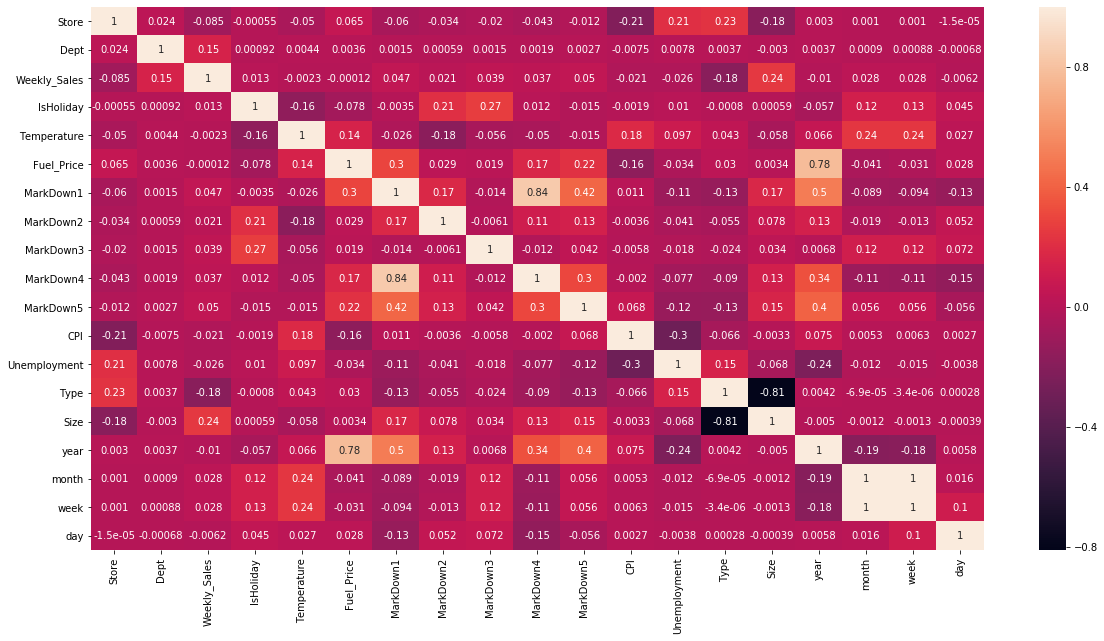

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [20]:
# most imp. feature - store,dept,isholiday,size,

In [21]:
train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'year', 'month',
       'week', 'day'],
      dtype='object')

In [22]:
train.shape

(421570, 20)

In [23]:
test.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'year', 'month', 'week', 'day'],
      dtype='object')

In [24]:
test.shape

(115064, 19)

In [25]:
train = train.drop(['Date','Temperature', 'Fuel_Price','MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI','Unemployment', 'Type','month'],axis=1)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train["Size"].values.reshape(-1,1))  #fit has to be done only on Train data
md5_train = scaler.transform(train["Size"].values.reshape(1,-1))

train['Size'] = md5_train.reshape(-1,1)


In [27]:
train['IsHoliday'] = pd.get_dummies(train['IsHoliday'],drop_first=True)

# Checking best hyperparameters on tarin data

In [28]:
X=train.drop('Weekly_Sales',axis=1)
X.shape

(421570, 7)

In [29]:
y=train['Weekly_Sales']
y.shape

(421570,)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train.shape

(337256, 7)

In [32]:
train['IsHoliday'] = pd.get_dummies(train['IsHoliday'],drop_first=True)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train["Size"].values.reshape(-1,1))  #fit has to be done only on Train data
md5_train = scaler.transform(train["Size"].values.reshape(1,-1))
train['Size'] = md5_train.reshape(-1,1)


In [41]:
# checking for random forest model
from xgboost import XGBRegressor
rf=XGBRegressor( n_estimators=360, max_depth=10)
rf.fit(X_train,y_train)

rf_pred=rf.predict(X_test)

In [39]:
y_test=y_test.to_list()

In [42]:
# checking the score
holiday_week=X_test['IsHoliday'].to_list()

def wmae_2(test,targ,holiday_week):
    error = 0
    s_w=0
    err=0
    for i in range(0,len(test)):
        if(holiday_week[i]==1):
            weight=5
        else: weight=1
        error+=weight*abs(test[i]-targ[i])
        s_w+=weight
    err=error/s_w
    return err

wmae_2(y_test,rf_pred,holiday_week)

1300.527284099927